# Ten thousand tweets as @BrainStraining

Today, I reached my 9,999 using the handle [@BrainStraining](https://twitter.com/BrainStraining). For my 10,000th tweet I wanted to both celebrate and see how I got here.  Earlier in the year I read a wonderfully geeky blog post by Julia Silge who used RStats to run some [cool analyses on her own first 10,000 tweets](http://juliasilge.com/blog/Ten-Thousand-Tweets/). The blog post contained her code. This seemed like a great idea so I am forking it.

Since I doubt I can add much to the good work that Julia did on the analysis side, I thought I'd see if I could add anything on the sharing side. I thought I'd try using a combination of Jupyter notebooks and Github. This is the result. 

Share and enjoy,  
Caspar  
[@BrainStraining](https://twitter.com/BrainStraining)
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a>


OK, let's go. First we need a few libraries. Surprisingly few.. Mainly due to the awesome power of `ggplot2` :)

And the tweets. We'll need those. Twitter has a handy button on your settings page that provides you will everything as a handy csv archive. If your unsure about that follow [these instructions](https://support.twitter.com/articles/20170160). Incidentally, the archive comes with quite a nice browser which lets you navigate your offline tweets by month. Well played, Twitter.

In [8]:
library(ggplot2)
library(lubridate)
library(scales)

tweets <- read.csv("./tweets.csv", stringsAsFactors = FALSE)

Next we need to convert the timestamps from UTC to local time, which in my case is London. Julia did this using the `lubridate` package. Sounds good to me.

In [9]:
tweets$timestamp <- ymd_hms(tweets$timestamp)
tweets$timestamp <- with_tz(tweets$timestamp, "Europe/London")

# Tweets by Year, Month and Day

Some basic historgrams

stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.


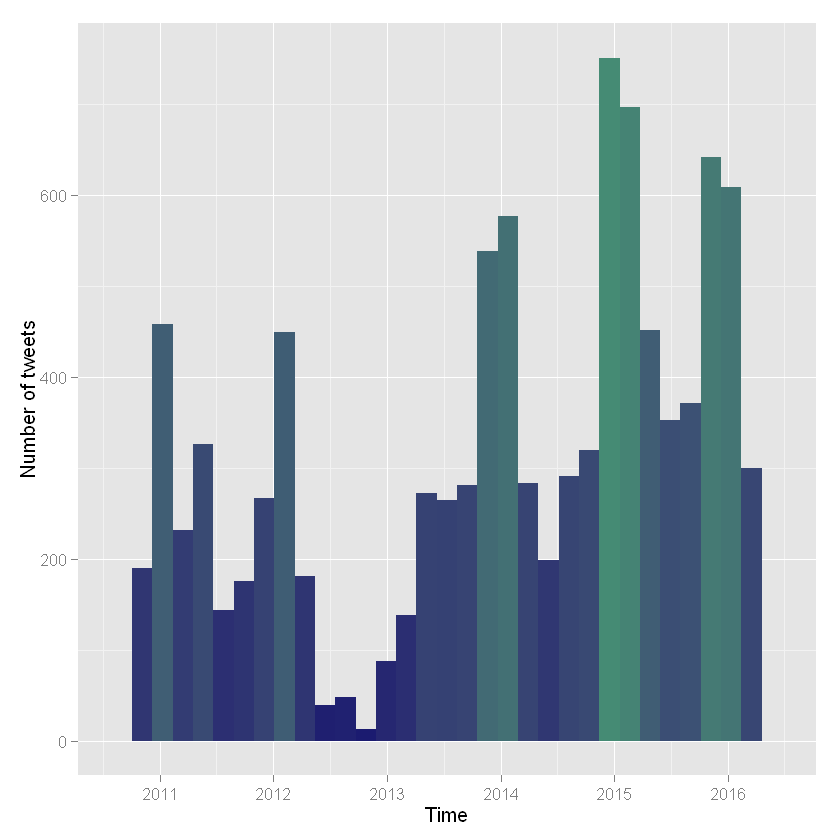

In [10]:
ggplot(data = tweets, aes(x = timestamp)) +
        geom_histogram(aes(fill = ..count..)) +
        theme(legend.position = "none") +
        xlab("Time") + ylab("Number of tweets") + 
        scale_fill_gradient(low = "midnightblue", high = "aquamarine4")

Alerady we're on to something interesting. It seems I am a highly seasonal tweeter. December and especially January seem to be my noisiest times of the year. January certainly makes sense. I love New Years and always start the year off full of enthusiasm and Curiously, the Twitter interface also provides a histogram by month. But the pattern doesn't leap out at you here.  
<img alt="Twitters monthly histograms" style="border-width:0" src="./twitter.histogram.png" />

The bins on that first graph aren't perfect. Let's group all my data by month to see things more clearly.

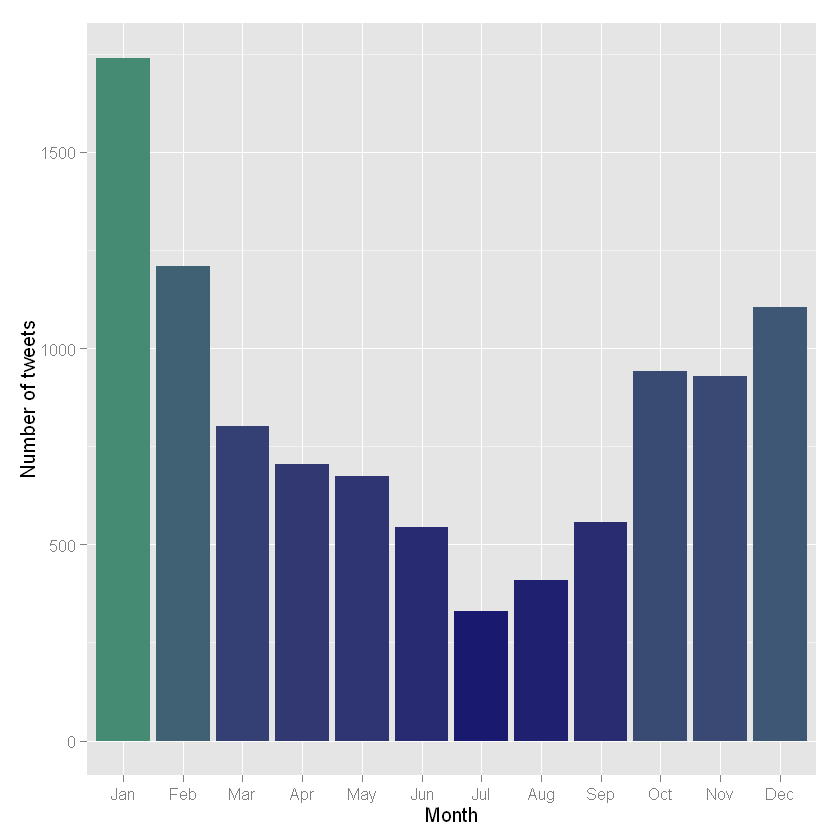

In [18]:
ggplot(data = tweets, aes(x = month(timestamp, label = TRUE))) +
        geom_histogram(aes(fill = ..count..)) +
        theme(legend.position = "none") +
        xlab("Month") + ylab("Number of tweets") + 
        scale_fill_gradient(low = "midnightblue", high = "aquamarine4")

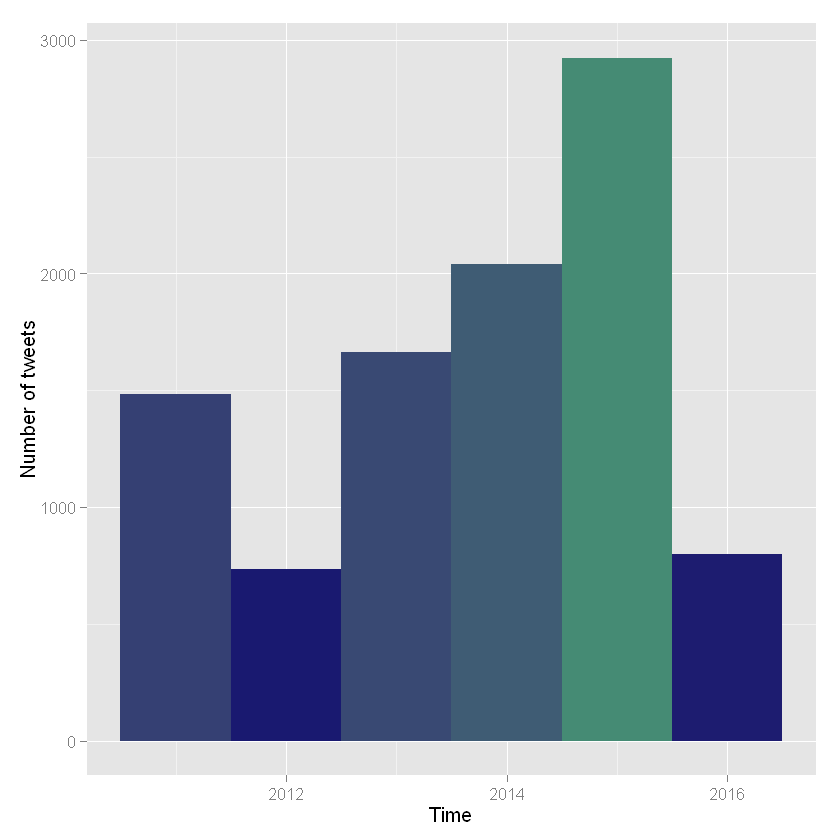

In [15]:
## By year

ggplot(data = tweets, aes(x = year(timestamp))) +
        geom_histogram(breaks = seq(2010.5, 2016.5, by =1), aes(fill = ..count..)) +
        theme(legend.position = "none") +
        xlab("Time") + ylab("Number of tweets") + 
        scale_fill_gradient(low = "midnightblue", high = "aquamarine4")

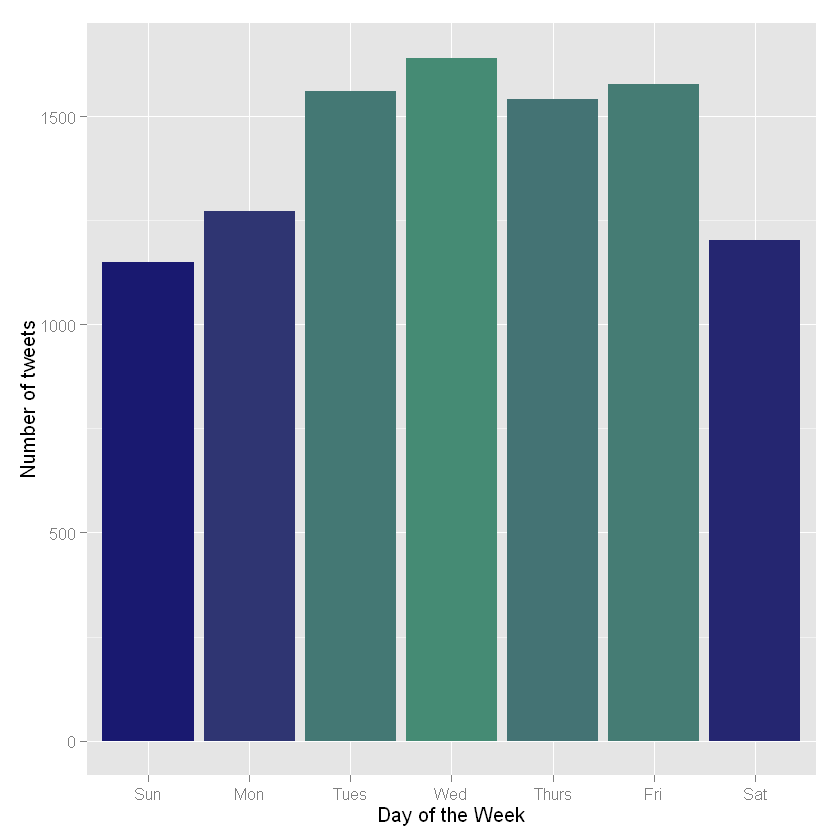

In [16]:
ggplot(data = tweets, aes(x = wday(timestamp, label = TRUE))) +
        geom_histogram(breaks = seq(0.5, 7.5, by =1), aes(fill = ..count..)) +
        theme(legend.position = "none") +
        xlab("Day of the Week") + ylab("Number of tweets") + 
        scale_fill_gradient(low = "midnightblue", high = "aquamarine4")

I am a humpday poster. As Julia shows, with R Stats, it's obviously very easy to get stats on these data. So let's to a Chi-Square goodness of fit test: 

In [19]:
chisq.test(table(wday(tweets$timestamp, label = TRUE)))


	Chi-squared test for given probabilities

data:  table(wday(tweets$timestamp, label = TRUE))
X-squared = 175.5242, df = 6, p-value < 2.2e-16


## Time of Day

A little bit more work is needed here to create a new column in our data with just the timestamp (as a number between 0 & 1). Again, Julia has done the work for us. Take the actual timestamp and remove the day part using the `trunc` function. 

In [21]:
tweets$timeonly <- as.numeric(tweets$timestamp - trunc(tweets$timestamp, "days"))

#tweets[(minute(tweets$timestamp) == 0 & second(tweets$timestamp) == 0),11] <- NA
#mean(is.na(tweets$timeonly))

Julia has been on twitter longer than me and found that 21% of her tweets appeared to be stamped as 00:00:00 UTC. The next two lines find these and label them as missing proper timestamps. When I ran that only 0.02% were labelled that way, which seems a fair proportion. So I commented those lines out. 

stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.


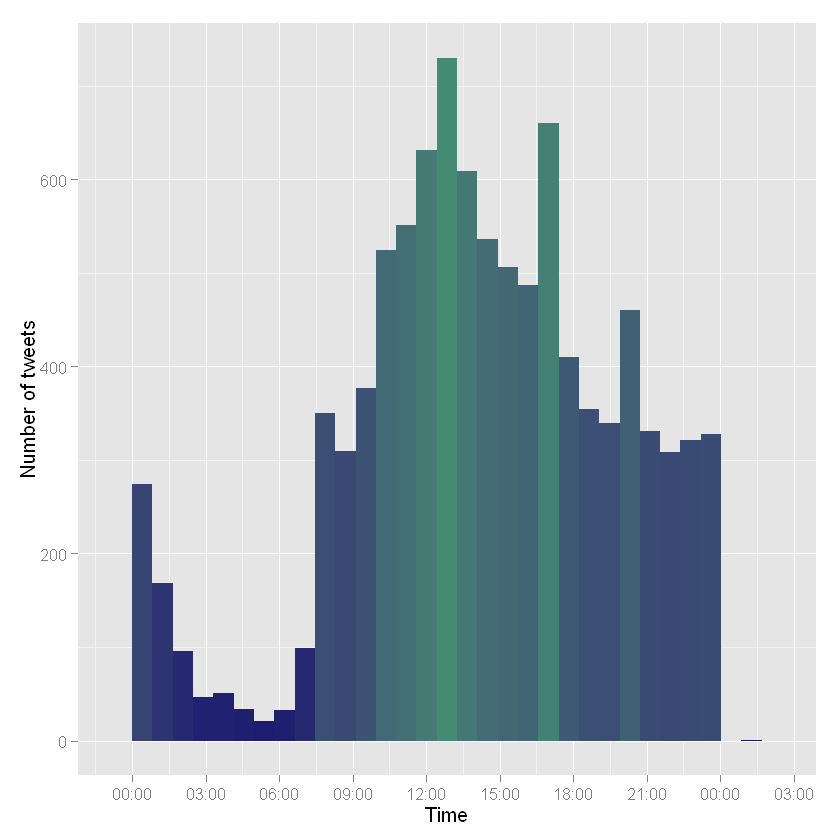

In [23]:
class(tweets$timeonly) <- "POSIXct"
ggplot(data = tweets, aes(x = timeonly)) +
        geom_histogram(aes(fill = ..count..)) +
        theme(legend.position = "none") +
        xlab("Time") + ylab("Number of tweets") + 
        scale_x_datetime(breaks = date_breaks("3 hours"), 
                         labels = date_format("%H:00")) +
        scale_fill_gradient(low = "midnightblue", high = "aquamarine4")

## Hashtags, retweets and replies

Again, I am just borrowing Julia's code. This next bit used 'grep' to pick out the #'s. Very simple, I've never got to grips with grep so I'd never have attempted that on my own. 

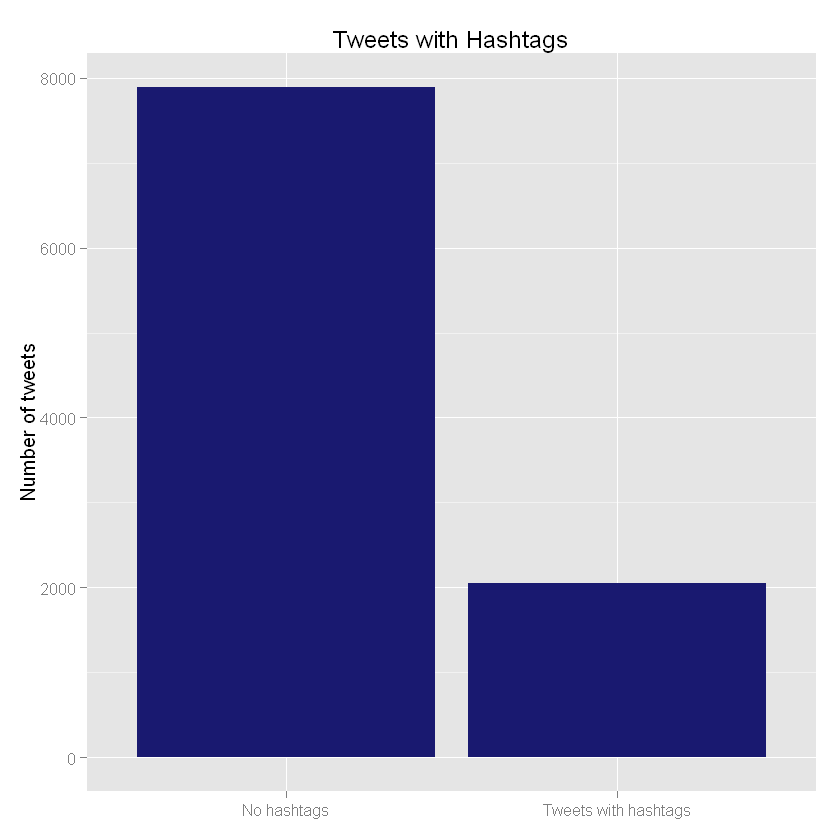

In [24]:
ggplot(tweets, aes(factor(grepl("#", tweets$text)))) +
        geom_bar(fill = "midnightblue") + 
        theme(legend.position="none", axis.title.x = element_blank()) +
        ylab("Number of tweets") + 
        ggtitle("Tweets with Hashtags") +
        scale_x_discrete(labels=c("No hashtags", "Tweets with hashtags"))

So 20% of my tweets have a have a hashtag. That a lot more than I expected. Now let's look at retweets. Obviously twitter has changed how these work. But fortunately they provide a handy `retweeted_status_id` flag.

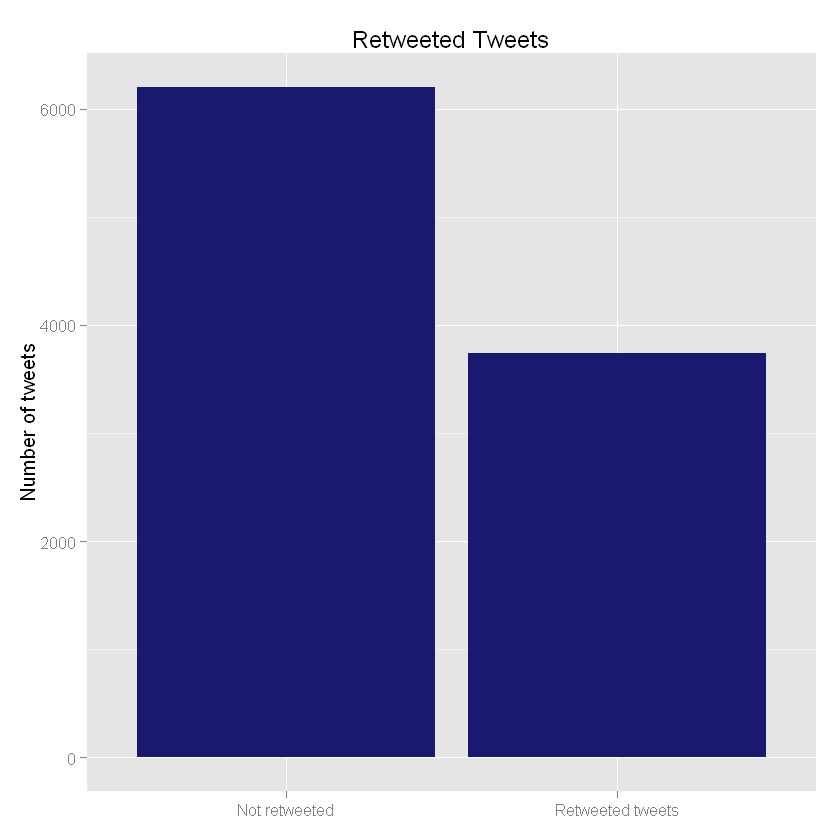

In [25]:
ggplot(tweets, aes(factor(!is.na(retweeted_status_id)))) +
        geom_bar(fill = "midnightblue") + 
        theme(legend.position="none", axis.title.x = element_blank()) +
        ylab("Number of tweets") + 
        ggtitle("Retweeted Tweets") +
        scale_x_discrete(labels=c("Not retweeted", "Retweeted tweets"))

Wow, over a third of my tweets aren't mine. I seem to reuse other people's work a lot. Reading this, who'd have thought? ;)
So perhaps this isn't really *my* first 10000 tweets after all> That depends on your view of the purpose of twitter, I suppose. 

## Replies

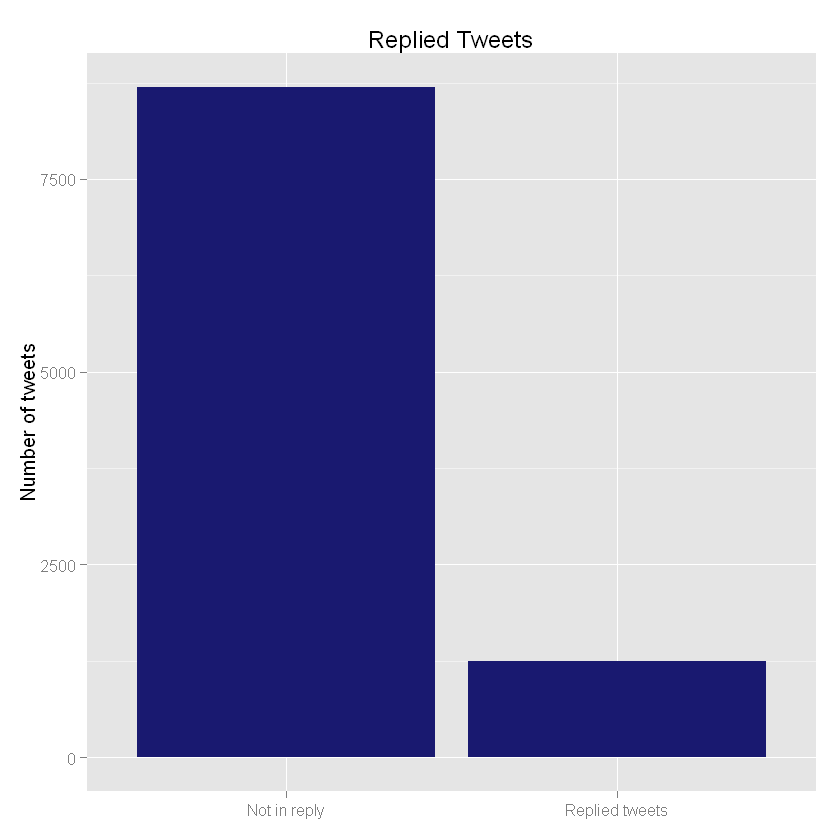

In [27]:
ggplot(tweets, aes(factor(!is.na(in_reply_to_status_id)))) +
        geom_bar(fill = "midnightblue") + 
        theme(legend.position="none", axis.title.x = element_blank()) +
        ylab("Number of tweets") + 
        ggtitle("Replied Tweets") +
        scale_x_discrete(labels=c("Not in reply", "Replied tweets"))

## Combining all three. 



stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.


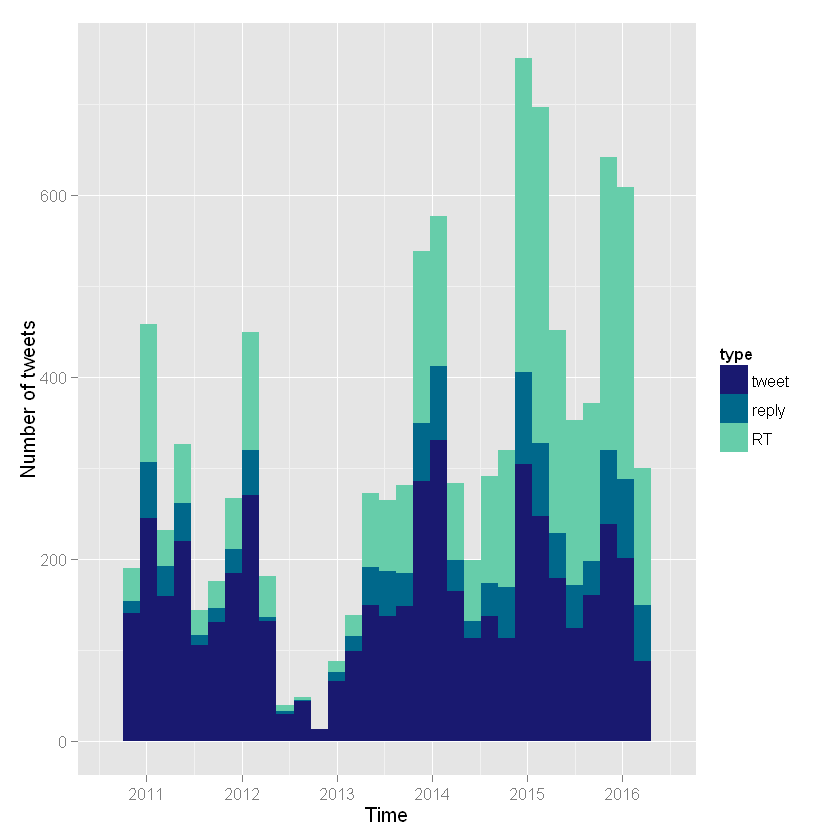

In [28]:
tweets$type <- "tweet"
tweets[(!is.na(tweets$retweeted_status_id)),12] <- "RT"
tweets[(!is.na(tweets$in_reply_to_status_id)),12] <- "reply"
tweets$type <- as.factor(tweets$type)
tweets$type = factor(tweets$type,levels(tweets$type)[c(3,1,2)])

ggplot(data = tweets, aes(x = timestamp, fill = type)) +
        geom_histogram() +
        xlab("Time") + ylab("Number of tweets") +
        scale_fill_manual(values = c("midnightblue", "deepskyblue4", "aquamarine3"))

Look at it like that, that's a lot of RTs. And the more I'm tweeting the more I'm retweeting. Julia replotted this data as proportions. For my highly variable distribution, proportions are rather misleading. But I include the code for your benefit.

stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.


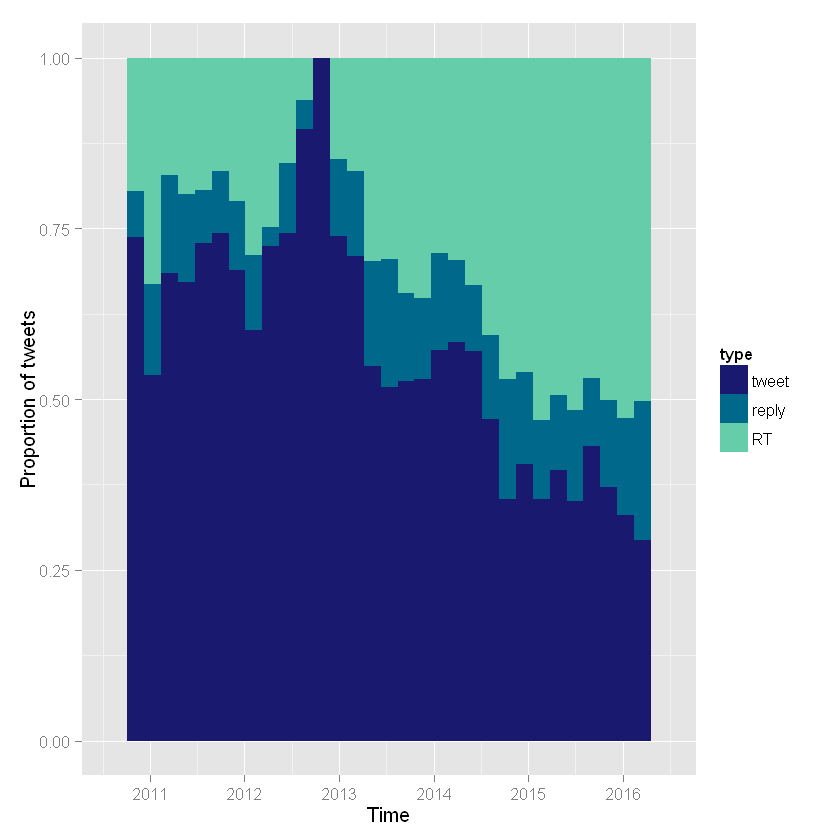

In [29]:
ggplot(data = tweets, aes(x = timestamp, fill = type)) +
        geom_bar(position = "fill") +
        xlab("Time") + ylab("Proportion of tweets") +
        scale_fill_manual(values = c("midnightblue", "deepskyblue4", "aquamarine3"))

## Counting chars

How long were my tweets. I have the intuition that I often try to use my full allowance of characters. I wonder if that's true.

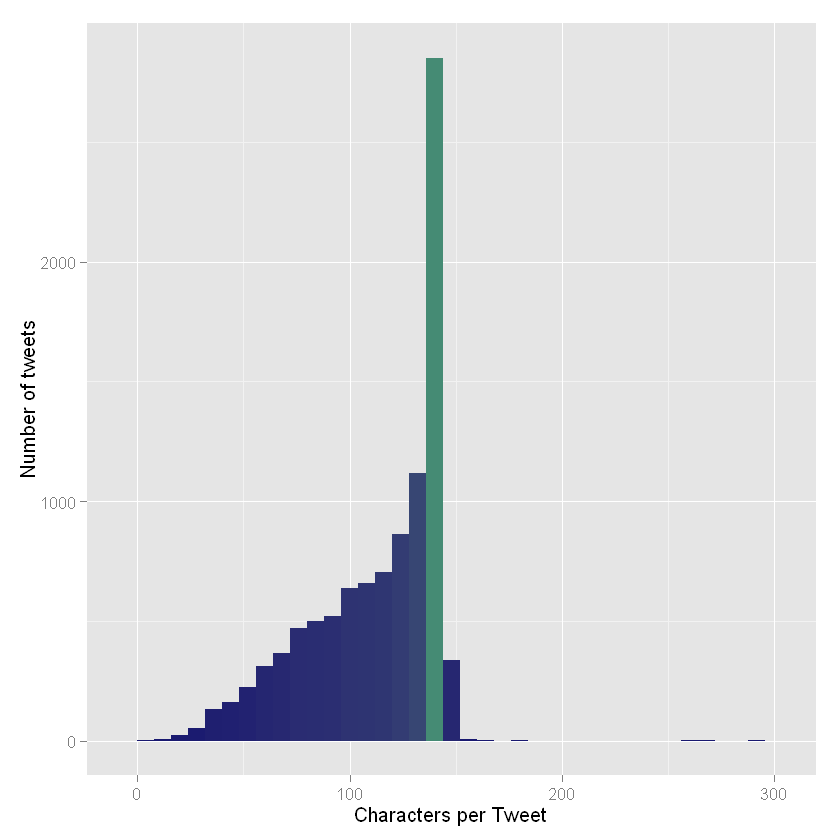

In [30]:
tweets$charsintweet <- sapply(tweets$text, function(x) nchar(x))
    
ggplot(data = tweets, aes(x = charsintweet)) +
    geom_histogram(aes(fill = ..count..), binwidth = 8) +
    theme(legend.position = "none") +
    xlab("Characters per Tweet") + ylab("Number of tweets") + 
    scale_fill_gradient(low = "midnightblue", high = "aquamarine4")
    

Yep. But notice anything weird? Let's find out what is going on here.

In [35]:
#tweets longer than 200 characters? WTF, dude?
tweets[(tweets$charsintweet > 200),]

#get their id's
tweets[(tweets$charsintweet > 200),]$tweet_id

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,timeonly,type,charsintweet
845,6.776505e+17,NA,NA,2015-12-18 00:44:06,Twitter for Android,RT @TwitAA_bot: â”â”â”â”â”â”’ â”“â”â”“â”â”“â”ƒ â”›â”—â”›â”—â”›â”ƒï¼¼â—‹ï¼ â”“â”â”“â”â”“â”ƒ / â”›â”—â”›â”—â”›â”ƒãƒŽ) â”“â”â”“â”â”“â”ƒ â”›â”—â”›â”—â”›â”ƒ â”“â”â”“â”â”“â”ƒ â”›â”—â”›â”—â”›â”ƒ â”“â”â”“â”â”“â”ƒ â”ƒâ”ƒâ”ƒâ”ƒâ”ƒâ”ƒ â”»â”»â”»â”»â”»â”»,6.776401e+17,799573489,2015-12-18 00:02:43 +0000,,1970-01-01 01:44:06,RT,264
2026,6.19896e+17,NA,NA,2015-07-11 16:48:18,Twitter for Android,RT @BenRothenberg: Serena '99: ðŸ‡ºðŸ‡¸ðŸ† '02: ðŸ‡«ðŸ‡·ðŸ†ðŸ‡¬ðŸ‡§ðŸ†ðŸ‡ºðŸ‡¸ðŸ† '03:ðŸ‡¦ðŸ‡ºðŸ†ðŸ‡¬ðŸ‡§ðŸ† '05: ðŸ‡¦ðŸ‡ºðŸ† '07: ðŸ‡¦ðŸ‡ºðŸ† '08: ðŸ‡ºðŸ‡¸ðŸ† '09: ðŸ‡¦ðŸ‡ºðŸ†ðŸ‡¬ðŸ‡§ðŸ† '10: ðŸ‡¦ðŸ‡ºðŸ†ðŸ‡¬ðŸ‡§ðŸ† '12: ðŸ‡¬ðŸ‡§ðŸ†ðŸ‡ºðŸ‡¸ðŸ† '13: ðŸ‡«ðŸ‡·ðŸ†ðŸ‡ºðŸ‡¸ðŸ† '14â€¦,6.198878e+17,56447187,2015-07-11 15:15:33 +0000,,1970-01-01 17:48:18,RT,295
9665,1.931773e+16,NA,NA,2010-12-27 09:04:41,TweetDeck,RT @LSDove: â€éº»è–¬ï¼ˆãƒŠãƒ«ã‚³ãƒ†ã‚£ã‚«ï¼‰ã®å…¨æ­´å²ã‚’èªžã£ã¦ãã‚Œã‚‹ã®ã¯èª°ã‹ã­ï¼Ÿãã‚Œã¯ã€Œæ–‡åŒ–ã€ã®æ­´å² - ã‚ã‚Œã‚ã‚Œã®ã„ã‚ã‚†ã‚‹é«˜åº¦ã«ç™ºé”ã—ãŸæ–‡åŒ–ã®æ­´å²ã¨å¤§å·®ãªã„ã‚‚ã®ã ã€‚â€ - ãƒ•ãƒªãƒ¼ãƒ‰ãƒªãƒ’ãƒ»ãƒ‹ãƒ¼ãƒã‚§,1.93114e+16,17057693,2010-12-27 08:39:30 +0000,,1970-01-01 10:04:41,RT,258


[1] 6.776505e+17 6.198960e+17 1.931773e+16

Looks like they were all RTs full of special characters. Jupyter isn't happy about that. You have to take a look on twitter to see what is really going on. This one by [Ben Rothenberg](https://twitter.com/BenRothenberg/status/619887760086822913) is good. Looking at the short tweets is interesting too. 

In [38]:
tweets[(tweets$charsintweet < 10),]
tweets[(tweets$charsintweet < 10),]$tweet_id

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,timeonly,type,charsintweet
498,6.938015e+17,NA,NA,2016-01-31 14:22:18,Twitter Web Client,wogone :(,NA,NA,,,1970-01-01 15:22:18,tweet,9
6959,3.402223e+17,NA,NA,2013-05-30 22:45:00,Twitter for Android,1729?,NA,NA,,,1970-01-01 23:45:00,tweet,5
9656,1.968489e+16,NA,NA,2010-12-28 09:23:37,TweetDeck,mornin',NA,NA,,,1970-01-01 10:23:37,tweet,7
9691,1.822261e+16,NA,NA,2010-12-24 08:33:03,TweetDeck,mornin',NA,NA,,,1970-01-01 09:33:03,tweet,7


[1] 6.938015e+17 3.402223e+17 1.968489e+16 1.822261e+16

These are make sense to me. [wogone :(](https://twitter.com/brainstraining/status/693801483876372480) refers to the death of Sir Terry Wogan. And as all mathematicians know 1729 is ["a very interesting number"](http://tiny.cc/1729).

It's getting late so that is all for now. But maybe tomorrow, I will add some wordclouds, etc.

In [ ]:
Rcode